#### 题目一 

In [1]:
import pandas as pd
sheetnames = pd.ExcelFile('sz50.xlsx',on_demand = True).sheet_names

In [2]:
from datetime import datetime
data = {}
for s in sheetnames:
    data[s] = pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
print(data.keys())

dict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


#### 题目二

In [3]:
df = data['600036.XSHG']

In [4]:
import numpy as np
import talib as ta
close = np.array(df['close'])
print(ta.MA(close, 10)[-5:])

[108.35  108.741 109.176 110.102 111.666]


#### 题目三

In [5]:
close_MA10 = pd.core.series.Series(ta.MA(close, 10))

In [6]:
close_MA10.index = df['close'].index

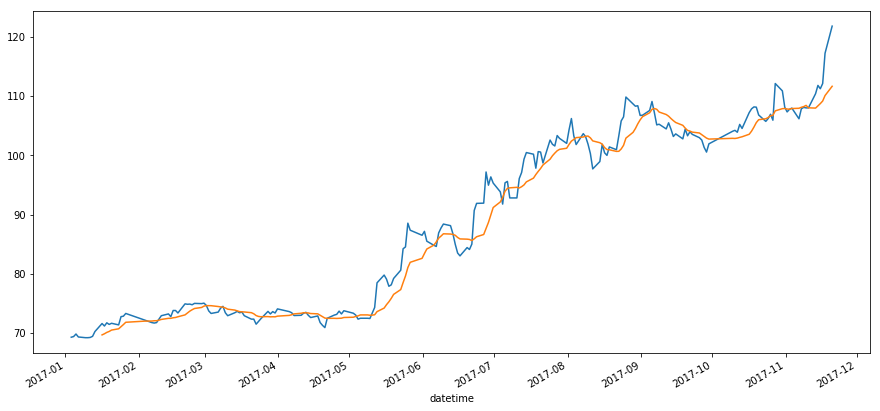

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,7))
df['close'].plot()
close_MA10.plot()
plt.show()

#### 题目四

In [9]:
df_ROCR100 = pd.DataFrame()
for (k,v) in data.items():
    try:
        df_ROCR100[k] = ta.ROCR100(v['close'],5)
    except KeyError:
        df_ROCR100[k] = pd.core.series.Series(np.repeat(np.nan,len(df)),index=df.index)

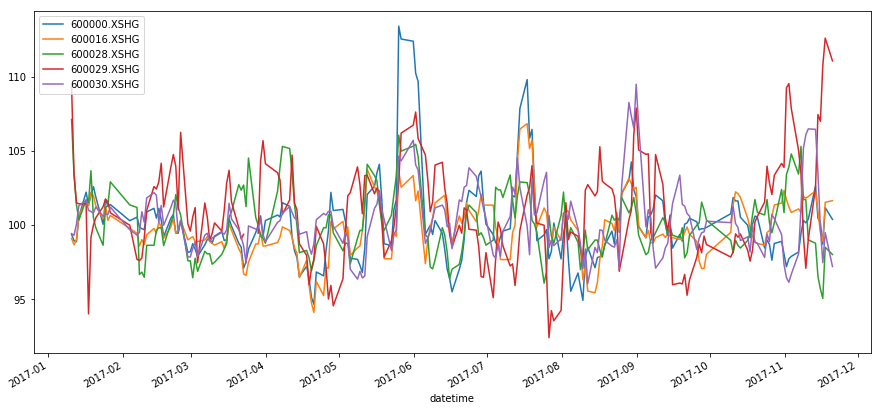

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,7))
for i in range(5):
    df_ROCR100[sheetnames[i]].plot()
plt.legend()
plt.show()

#### 题目五

In [11]:
dict_pn = {}
factors = ['macd','macdsignal','macdhist']
for i in range(3):
    dict_pn[factors[i]] = pd.DataFrame()
    for (k,v) in data.items():
        try:
            dict_pn[factors[i]][k] = ta.MACD(v['close'])[i]
        except KeyError:
            dict_pn[factors[i]][k] = pd.core.series.Series(np.repeat(np.nan,len(df)),index=df.index)

In [12]:
pn = pd.Panel(dict_pn)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
mi = pn.to_frame()

In [14]:
print(mi)

                                      macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600029.XSHG   0.221787    0.132200   0.089587
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600050.XSHG  -0.105248   -0.189278   0.084029
                    600100.XSHG   0.453028    0.079491   0.373537
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600340.XSHG   8.025312    5.194384   2.830927
                    600518.XSHG   1.014290    2.387216  -1.372926
          